In [4]:
import torch as th
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as matc

stats = th.load("data/stats_2023-09-30 21_20_55.534873.pth")

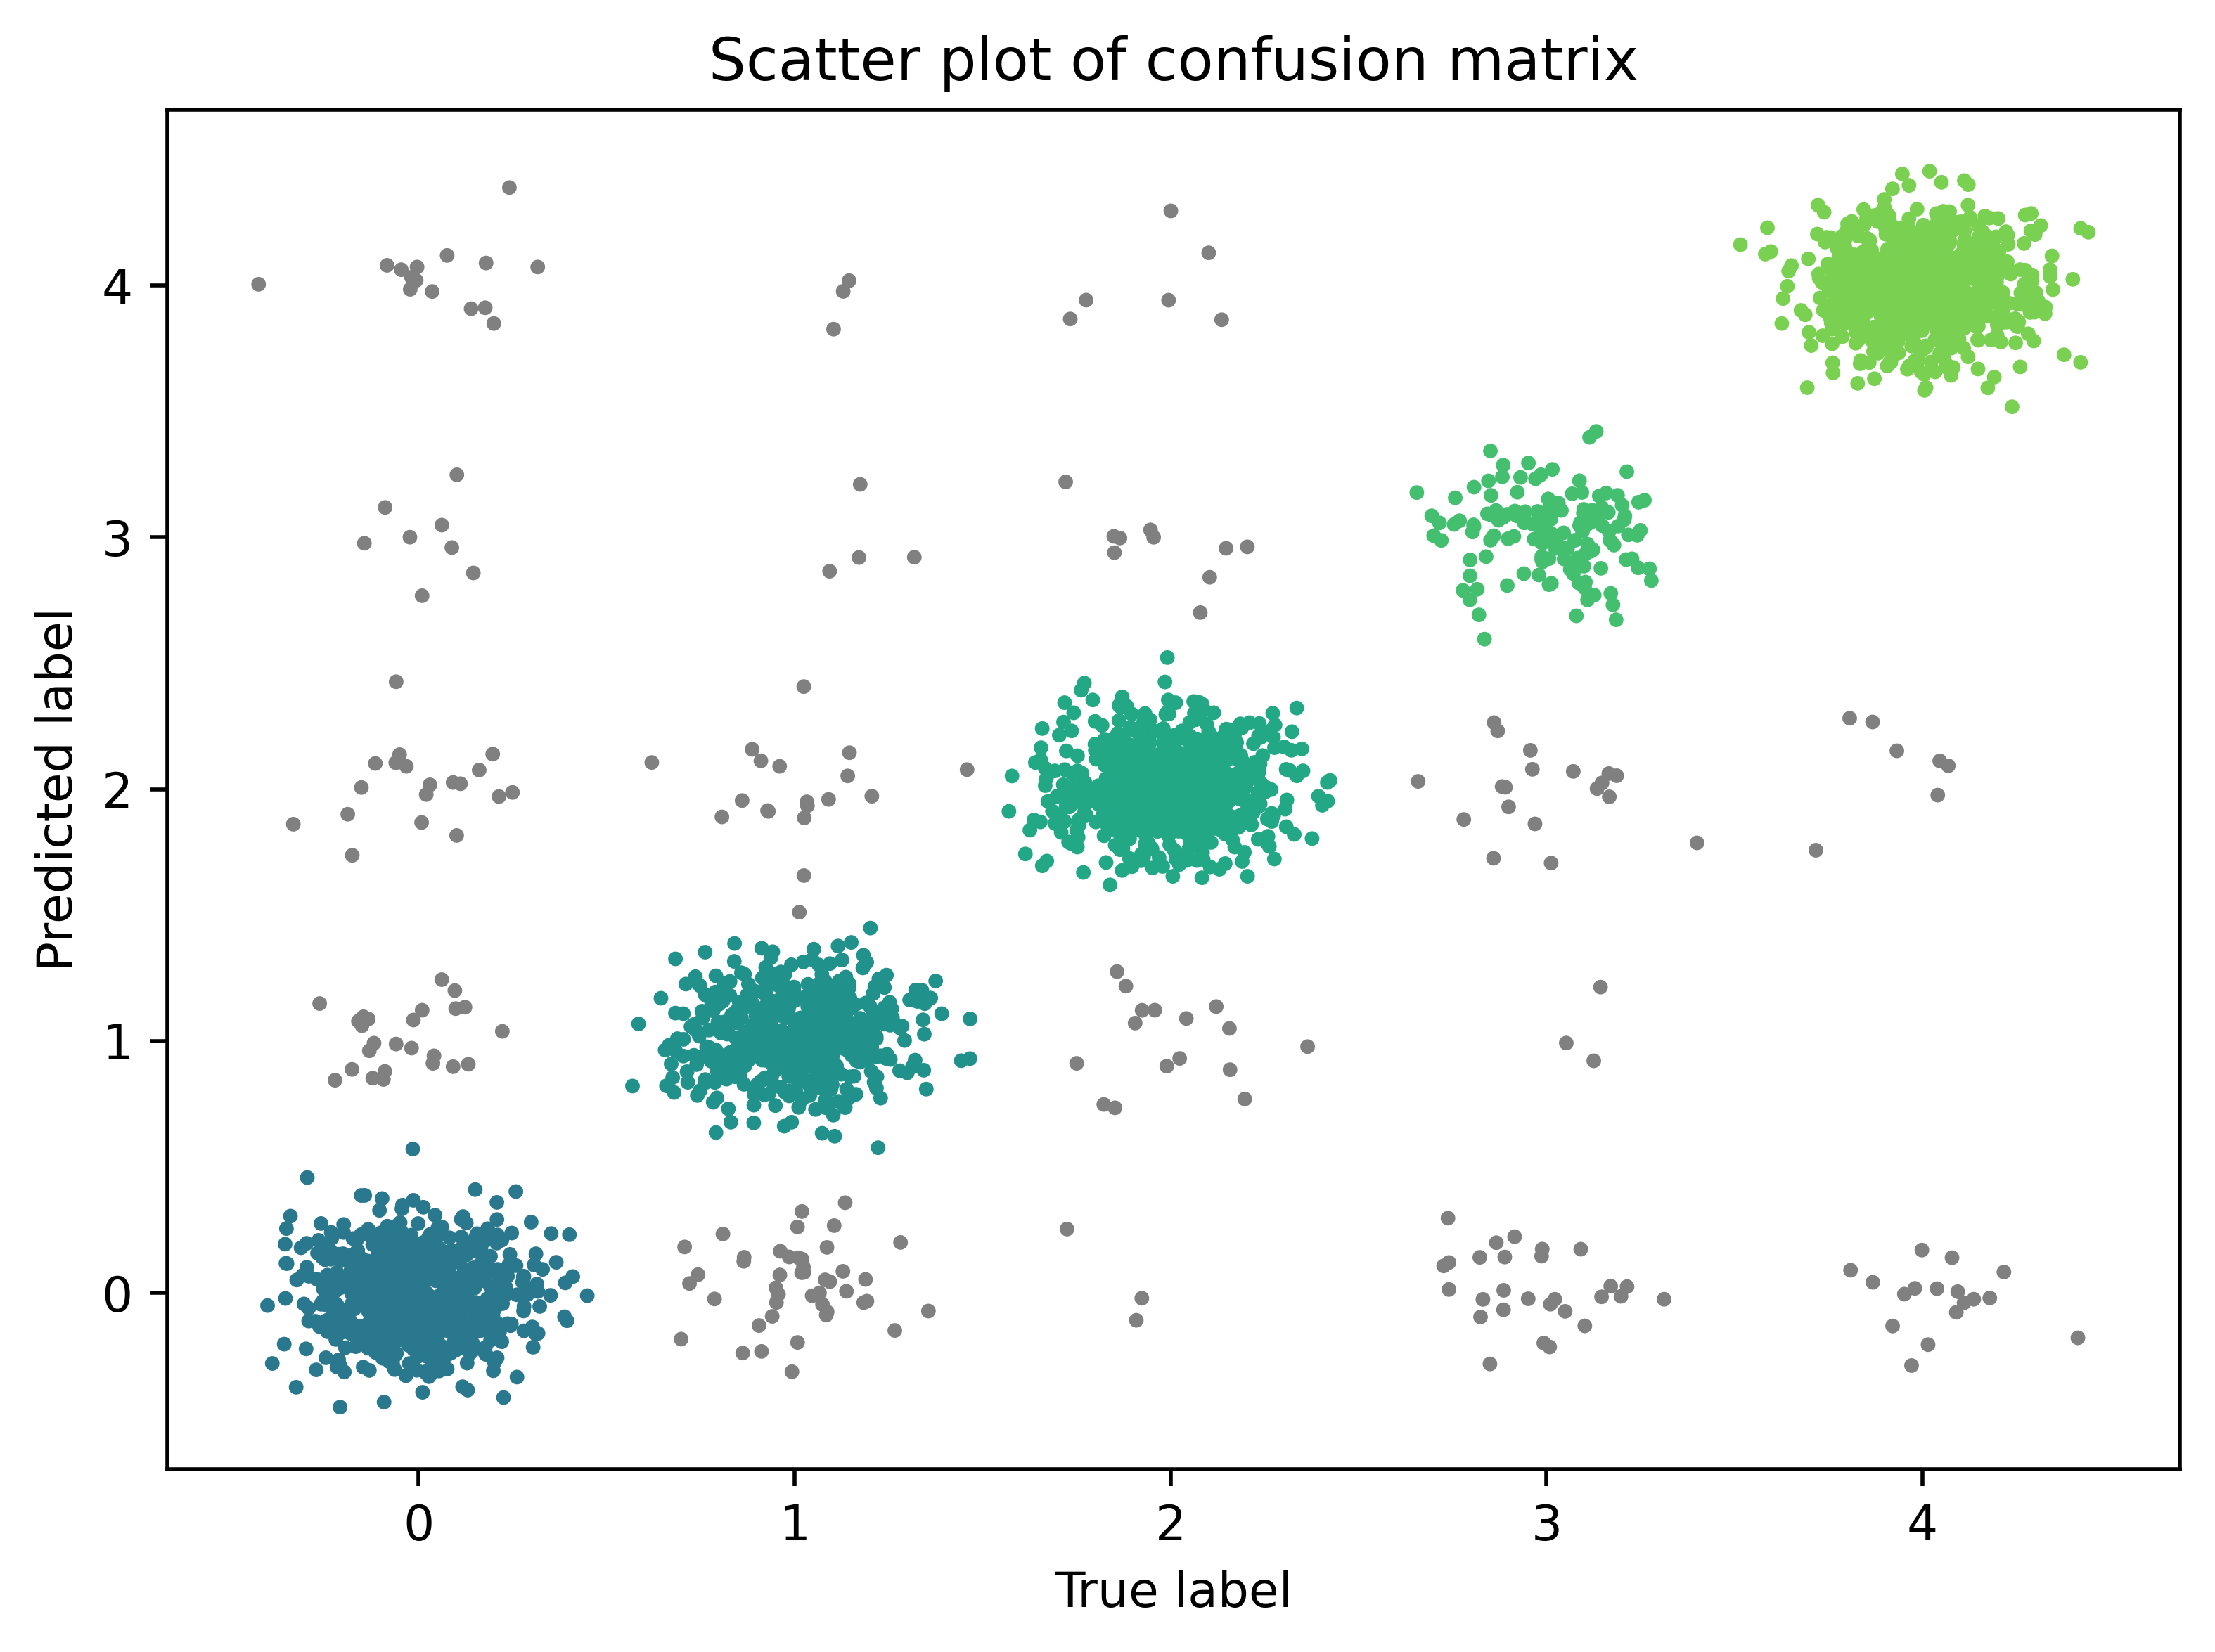

In [5]:

predicted_labels = np.array(stats['trial_predicted_label'])
true_labels = np.array(stats['trial_true_label'])

# Create a color array
colors = np.full_like(predicted_labels, 'gray', dtype='<U7')

unique_values = np.unique(true_labels)
color_map = plt.get_cmap('viridis', len(unique_values)+6)

for i, value in enumerate(unique_values):
    rgba_color = color_map(i+4)
    hex_color = matc.to_hex(rgba_color)
    colors[(predicted_labels == value) * (true_labels == value)] = hex_color

# Add small normal noise to the labels
noise_x = np.random.normal(0.0, .15, predicted_labels.shape)
noise_y = np.random.normal(0.0, .15, true_labels.shape)
predicted_labels = predicted_labels + noise_x
true_labels = true_labels + noise_y

plt.figure(dpi=500, frameon=True)
plt.title('Scatter plot of confusion matrix')
plt.scatter(predicted_labels, true_labels, c=colors, s=9, edgecolors='none')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.tight_layout()
plt.show()

In [6]:
stats['average_accuracy']

0.9203596660244059

In [7]:
stats['sensitivity']

{0: 0.88375, 1: 0.918625678119349, 2: 0.92, 3: 0.8633540372670807, 4: 0.97}